In [1]:
import pandas as pd

C:\Users\angie\AppData\Local\Temp\ipykernel_13320\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_excel("data nuevo.xlsx", index_col=0)
var_continuas=["targeted_productivity","smv","wip","over_time","incentive","idle_time","idle_men","no_of_style_change", "no_of_workers","actual_productivity"]
var_categoricas=["day", "quarter","department","team"]

df_continuas=data[var_continuas]
df_categoricas=data[var_categoricas]


In [3]:
data.shape

(1197, 14)

In [4]:
data.head()
#df_continuas.head(10)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


- 01 date(cat): Fecha en MM-DD-AAAA
- 02 day(cat): Día de la semana
- 03 quarter (cat): Una porción del mes. Un mes se dividió entre 4 y 5 partes.
- 04 department (cat): Departamento asociado a la instancia
- 05 team_no (cat): número de equipo asociado con la instancia
- 06 no_of_workers (cont): Número de trabajadores en cada equipo
- 07 no_of_style_change (cont): Número de cambios en el estilo de un producto en particular
- 08 target_productivity (cont): Productividad objetivo establecida para cada equipo para cada día.
- 09 smv (cont): Valor de minutos estándar, es el tiempo asignado para una tarea
- 10 wip (cont) Trabajo en progreso. Incluye la cantidad de elementos sin terminar.
- 11 over_time (cont): Representa la cantidad de tiempo extra de cada equipo en minutos.
- 12 incentive (cont): Representa la cantidad de incentivo financiero (en unidades monetarias).
- 13 idle_time (cont): La cantidad de tiempo durante el cual la producción estuvo interrumpida.
- 14 idle_men (cont): El número de trabajadores que estaban inactivos debido a la interrupción de la producción.
- 15 actual_productivity (cont): El % real de productividad que entregaron los trabajadores. Varía de 0 a 1.


### Tipo de variables

In [5]:
data.dtypes

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

## Estadisticas descriptivas

In [6]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1395.647261,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1190.465991,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1190.465991,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


### Incluir seaborn para Visualización

In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

In [14]:
#import seaborn as sns
#import matplotlib.pyplot as plt

#for column in data.columns:
 #   plt.figure(figsize=(8, 6))  # Tamaño de la figura
  #  sns.pairplot(data, height=5, x_vars=[column], y_vars=data.columns)  # Crear pairplot
   # plt.title(f'Relación de la variable {column} con todas las demás variables')  # Título del pairplot
    #plt.tight_layout()  # Ajustar diseño
    #plt.show()  # Mostrar pairplot

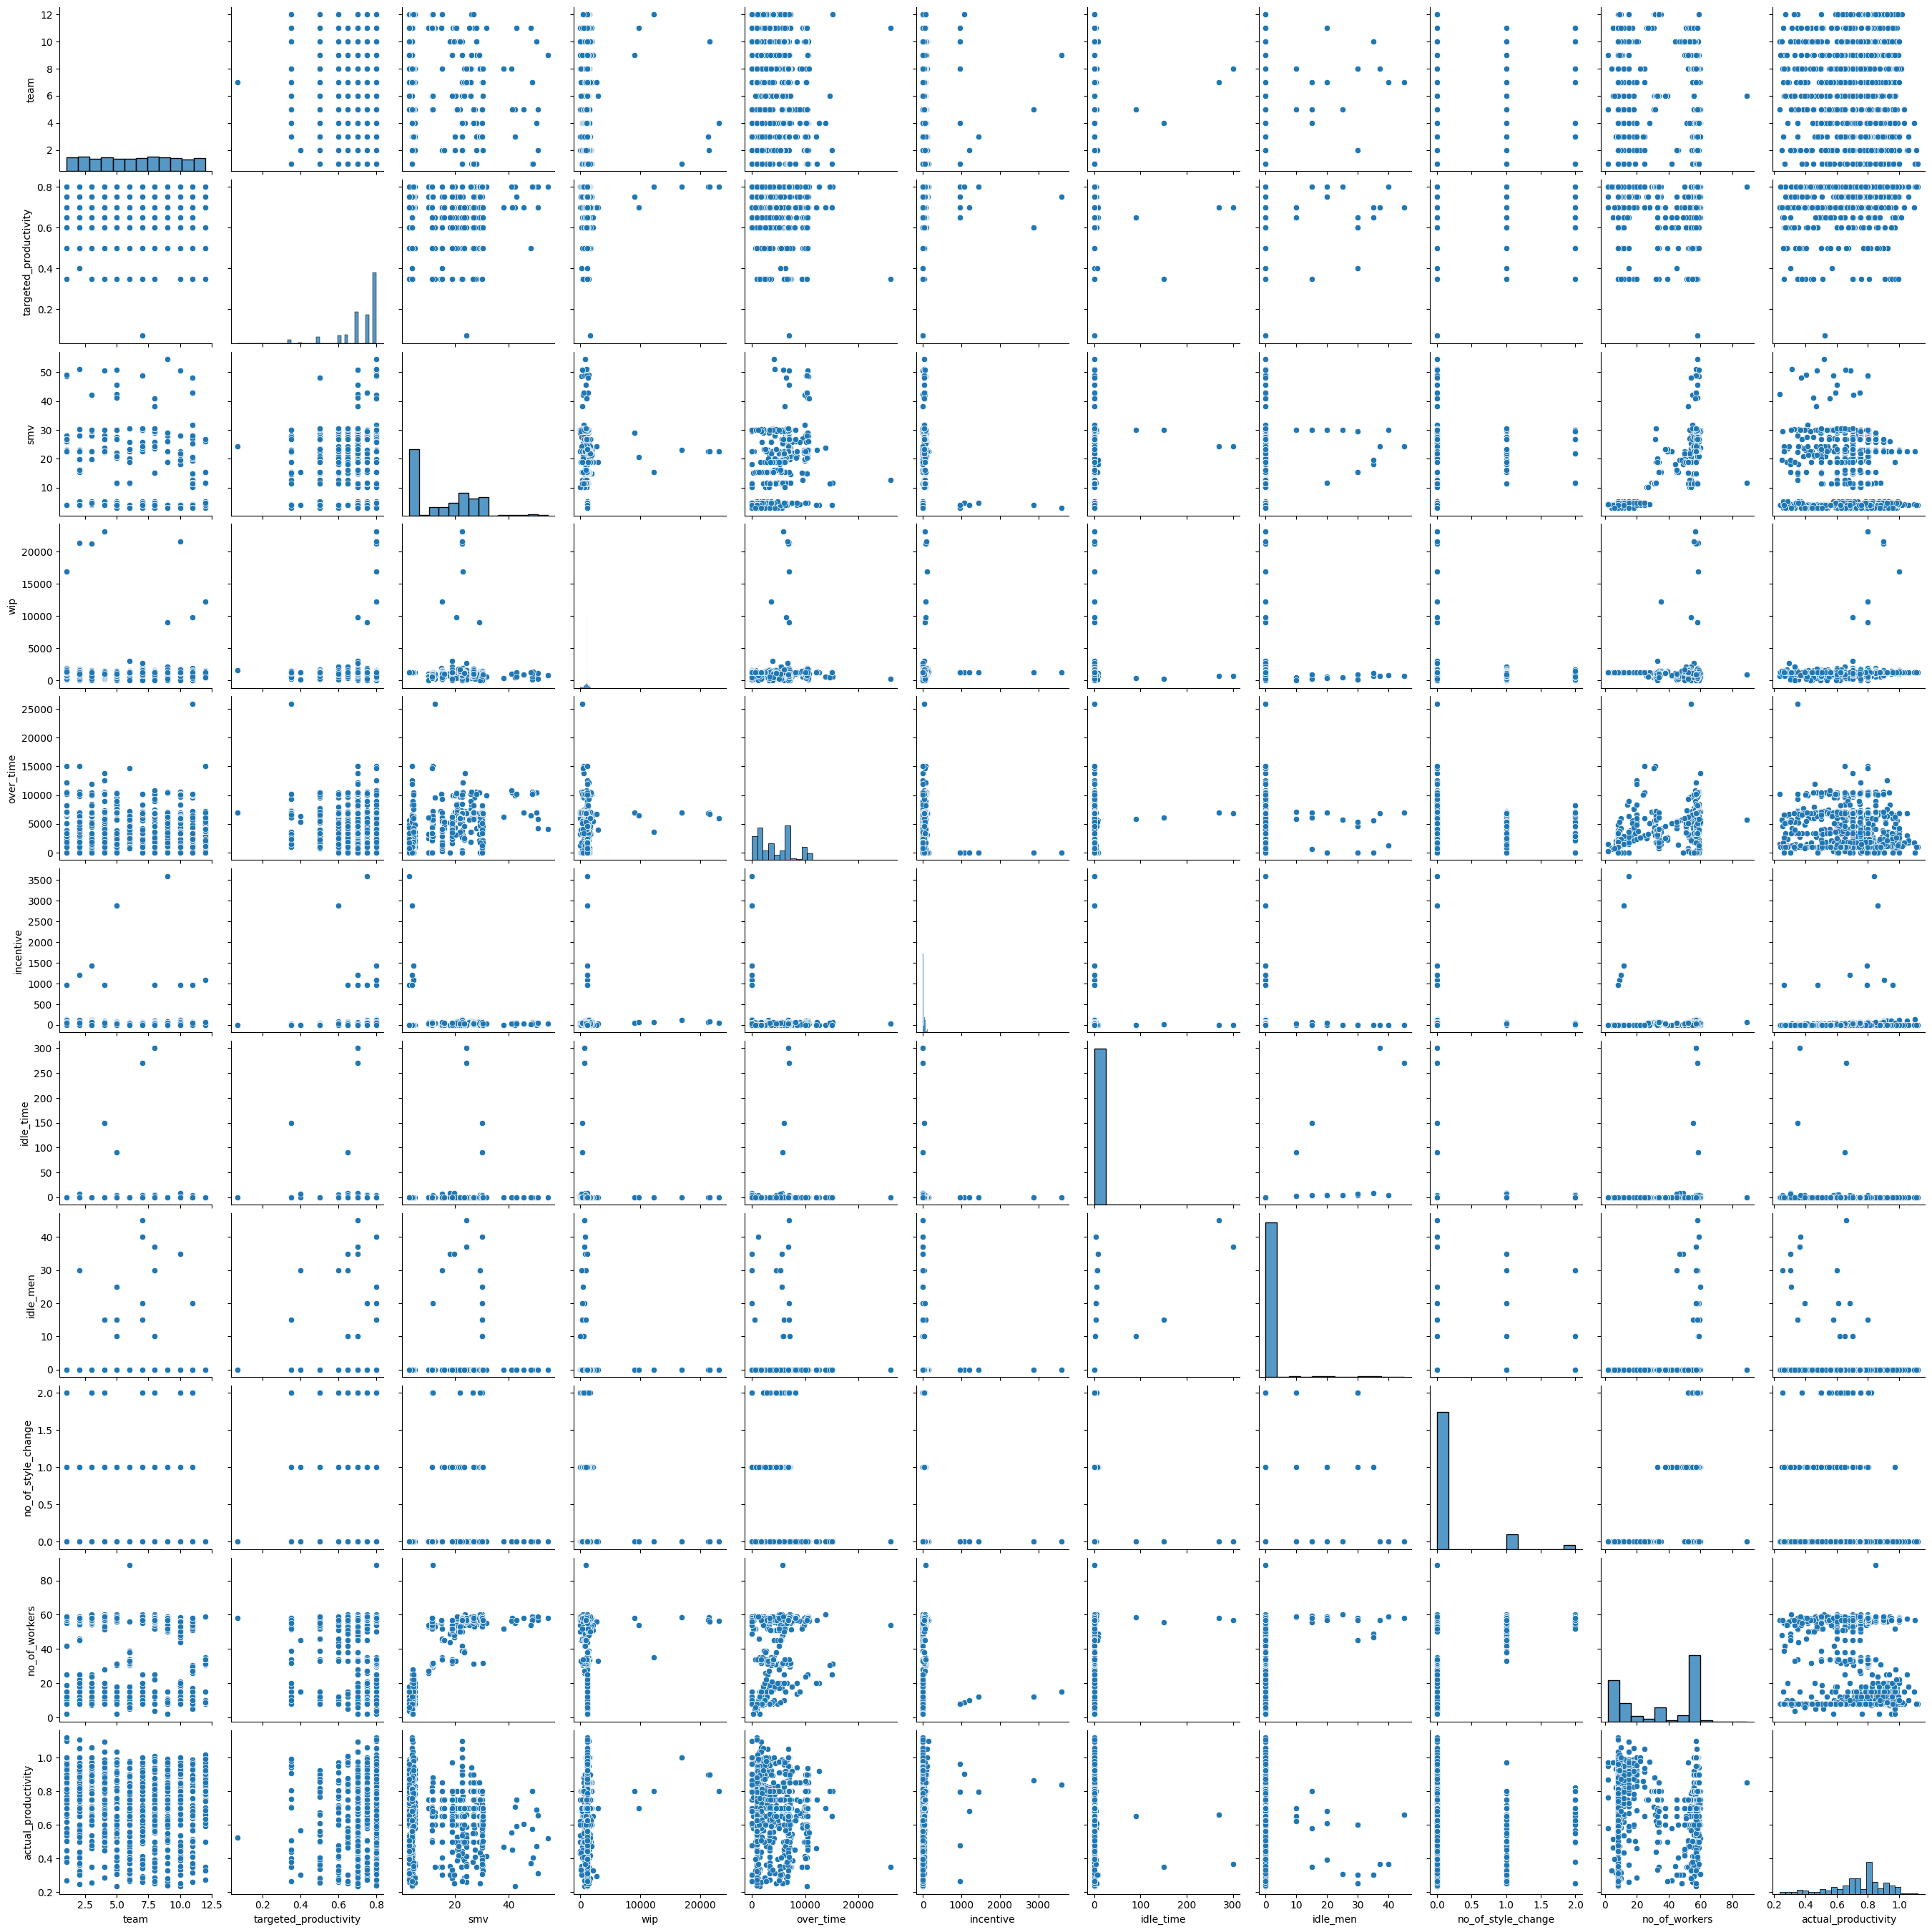

In [9]:
sns.pairplot(data)

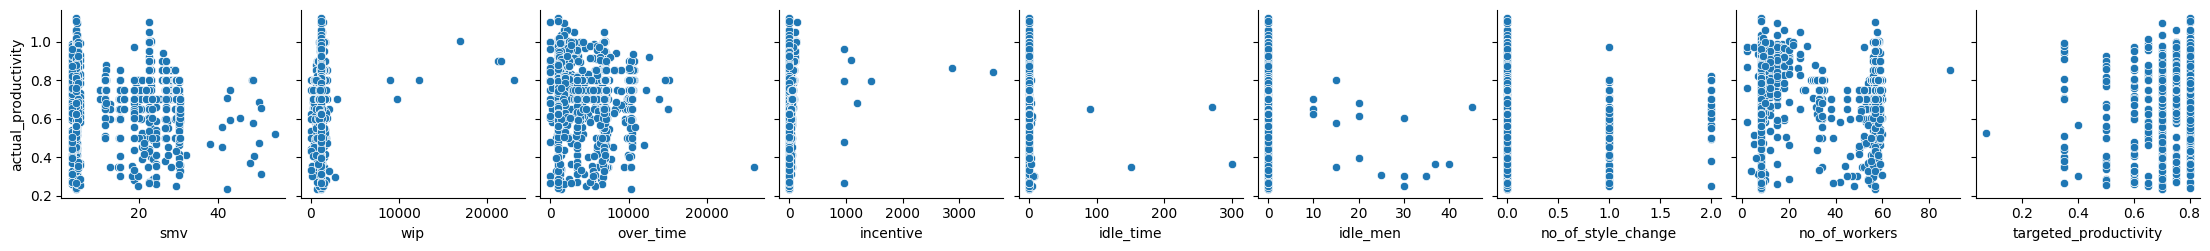

In [10]:
sns.pairplot(data,x_vars=["smv","wip","over_time","incentive","idle_time","idle_men",
             "no_of_style_change", "no_of_workers","targeted_productivity"], y_vars="actual_productivity")

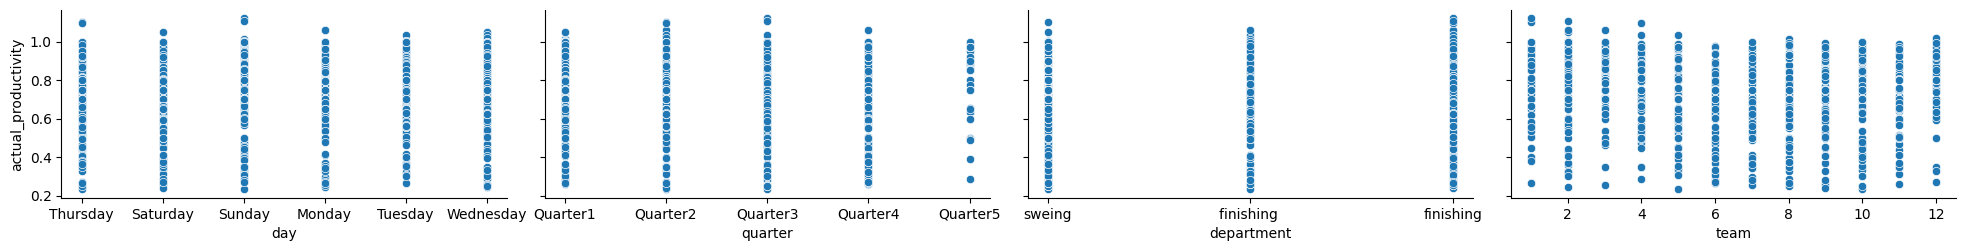

In [11]:
sns.pairplot(data,x_vars=["day", "quarter","department","team"], y_vars="actual_productivity",height=2.5, aspect=2)

 ## Histogramas para las variables continuas

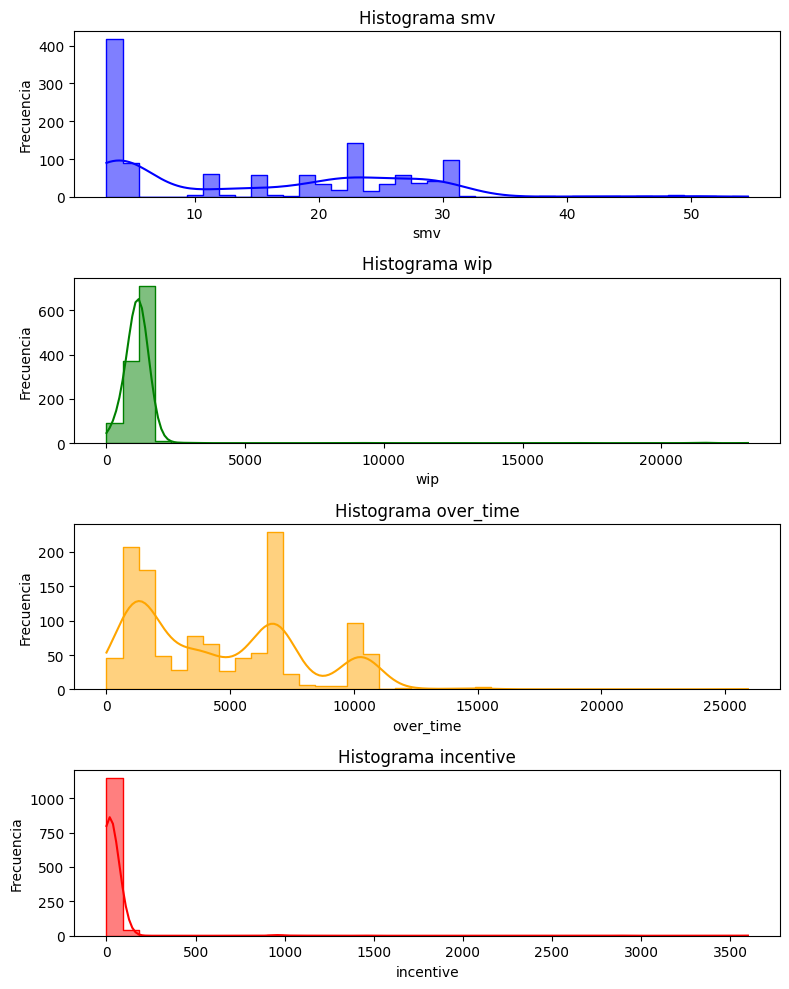

In [12]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(4, 1, figsize=(8, 10))

sns.histplot(data["smv"], bins=40, kde=True, element='step', ax=axs[0], color='blue')
axs[0].set_title('Histograma smv')
axs[0].set_ylabel("Frecuencia") 

sns.histplot(data["wip"], bins=40, kde=True, element='step', ax=axs[1], color='green')
axs[1].set_title('Histograma wip')
axs[1].set_ylabel("Frecuencia") 


sns.histplot(data["over_time"], bins=40, kde=True, element='step', ax=axs[2], color='orange')
axs[2].set_title('Histograma over_time')
axs[2].set_ylabel("Frecuencia") 


sns.histplot(data["incentive"], bins=40, kde=True, element='step', ax=axs[3], color='red')
axs[3].set_title('Histograma incentive')
axs[3].set_ylabel("Frecuencia") 


# Ajusta el espacio entre subgráficos
plt.tight_layout()

# Muestra el gráfico
plt.show()



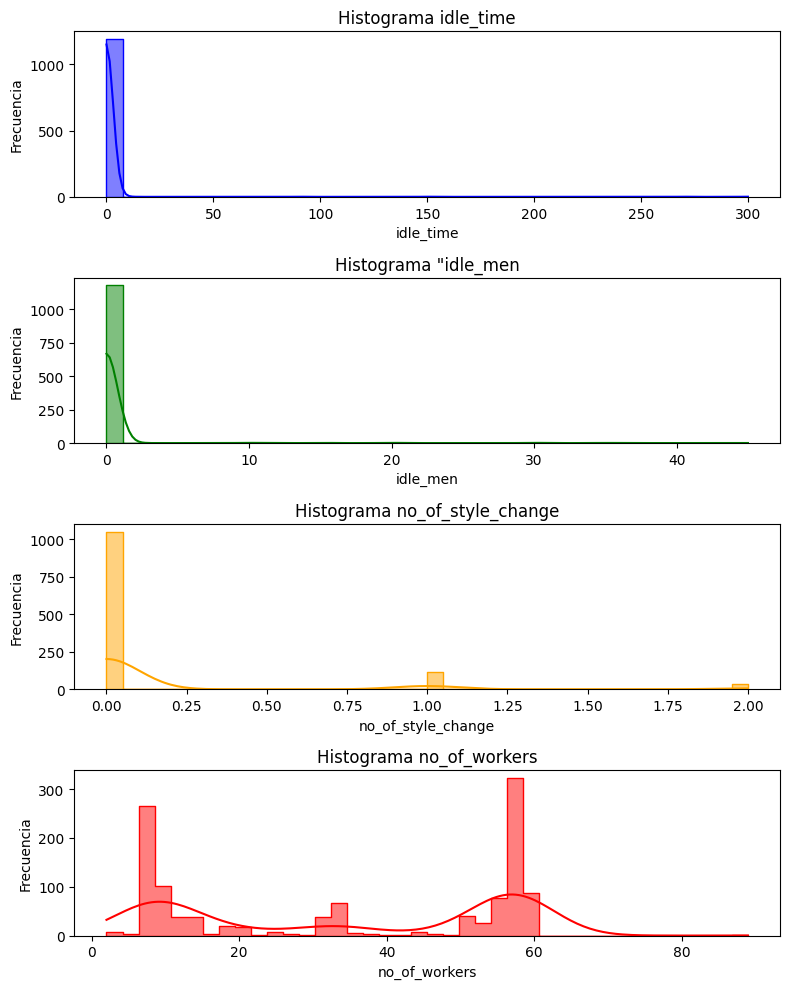

In [13]:

fig, axs = plt.subplots(4, 1, figsize=(8, 10))

sns.histplot(data["idle_time"],bins=40, kde=True, element='step', ax=axs[0], color='blue')
axs[0].set_title('Histograma idle_time')
axs[0].set_ylabel("Frecuencia") 

sns.histplot(data["idle_men"], bins=40, kde=True, element='step', ax=axs[1], color='green')
axs[1].set_title('Histograma "idle_men')
axs[1].set_ylabel("Frecuencia") 


sns.histplot(data["no_of_style_change"], bins=40, kde=True, element='step', ax=axs[2], color='orange')
axs[2].set_title('Histograma no_of_style_change')
axs[2].set_ylabel("Frecuencia") 


sns.histplot(data["no_of_workers"], bins=40, kde=True, element='step', ax=axs[3], color='red')
axs[3].set_title('Histograma no_of_workers')
axs[3].set_ylabel("Frecuencia") 


# Ajusta el espacio entre subgráficos
plt.tight_layout()

# Muestra el gráfico
plt.show()


## Pie chart para las variables categoricas

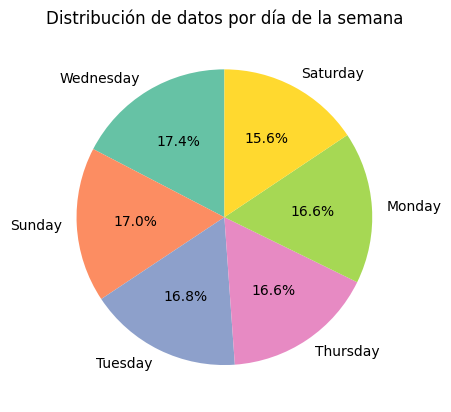

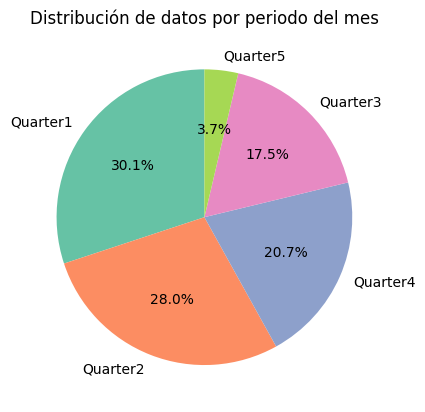

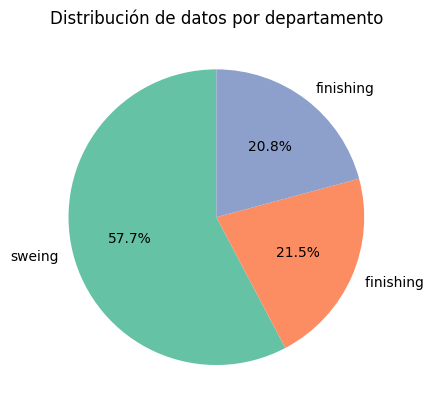

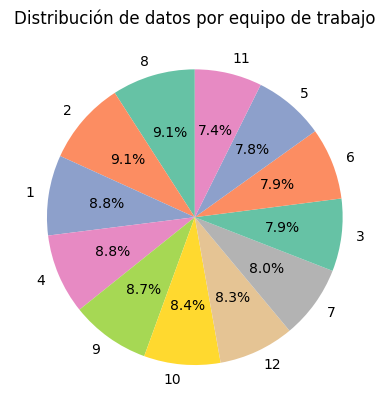

In [14]:
#Day

plt.pie(data["day"].value_counts(), labels=data["day"].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Distribución de datos por día de la semana')

plt.show()


#Quarter
plt.pie(data["quarter"].value_counts(), labels=data["quarter"].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Distribución de datos por periodo del mes')

plt.show()

#Department
plt.pie(data["department"].value_counts(), labels=data["department"].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Distribución de datos por departamento')

plt.show()

#Team
plt.pie(data["team"].value_counts(), labels=data["team"].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Distribución de datos por equipo de trabajo')

plt.show()



### Matriz de correlación

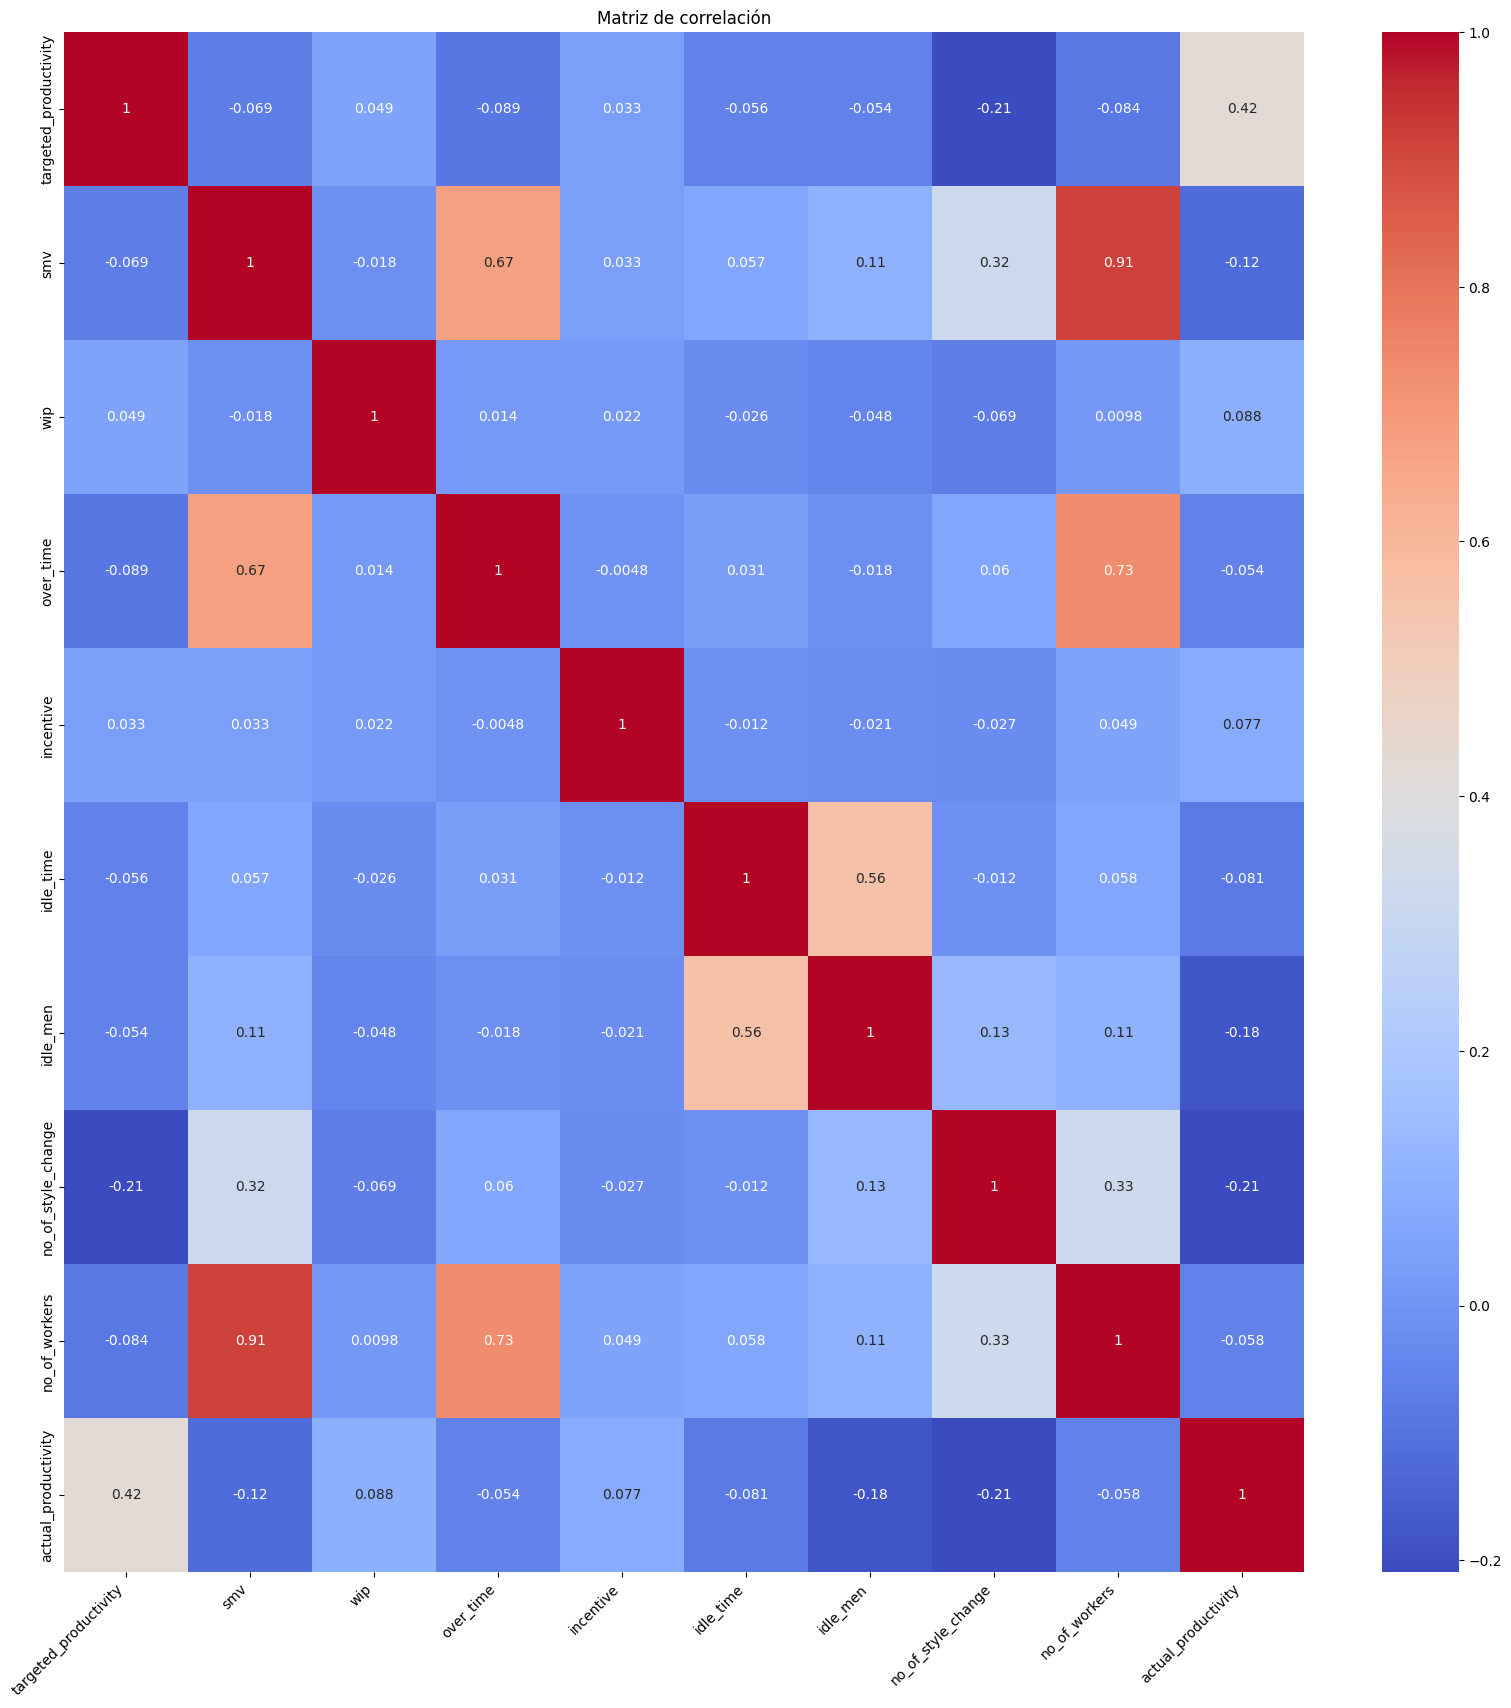

In [15]:
import seaborn as sb

corr = df_continuas.corr()
plt.figure(figsize=(20, 20)) 
sb.heatmap(corr, cmap='coolwarm', annot=True, xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.title('Matriz de correlación')
plt.xticks(rotation=45, ha="right") 
plt.show()

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

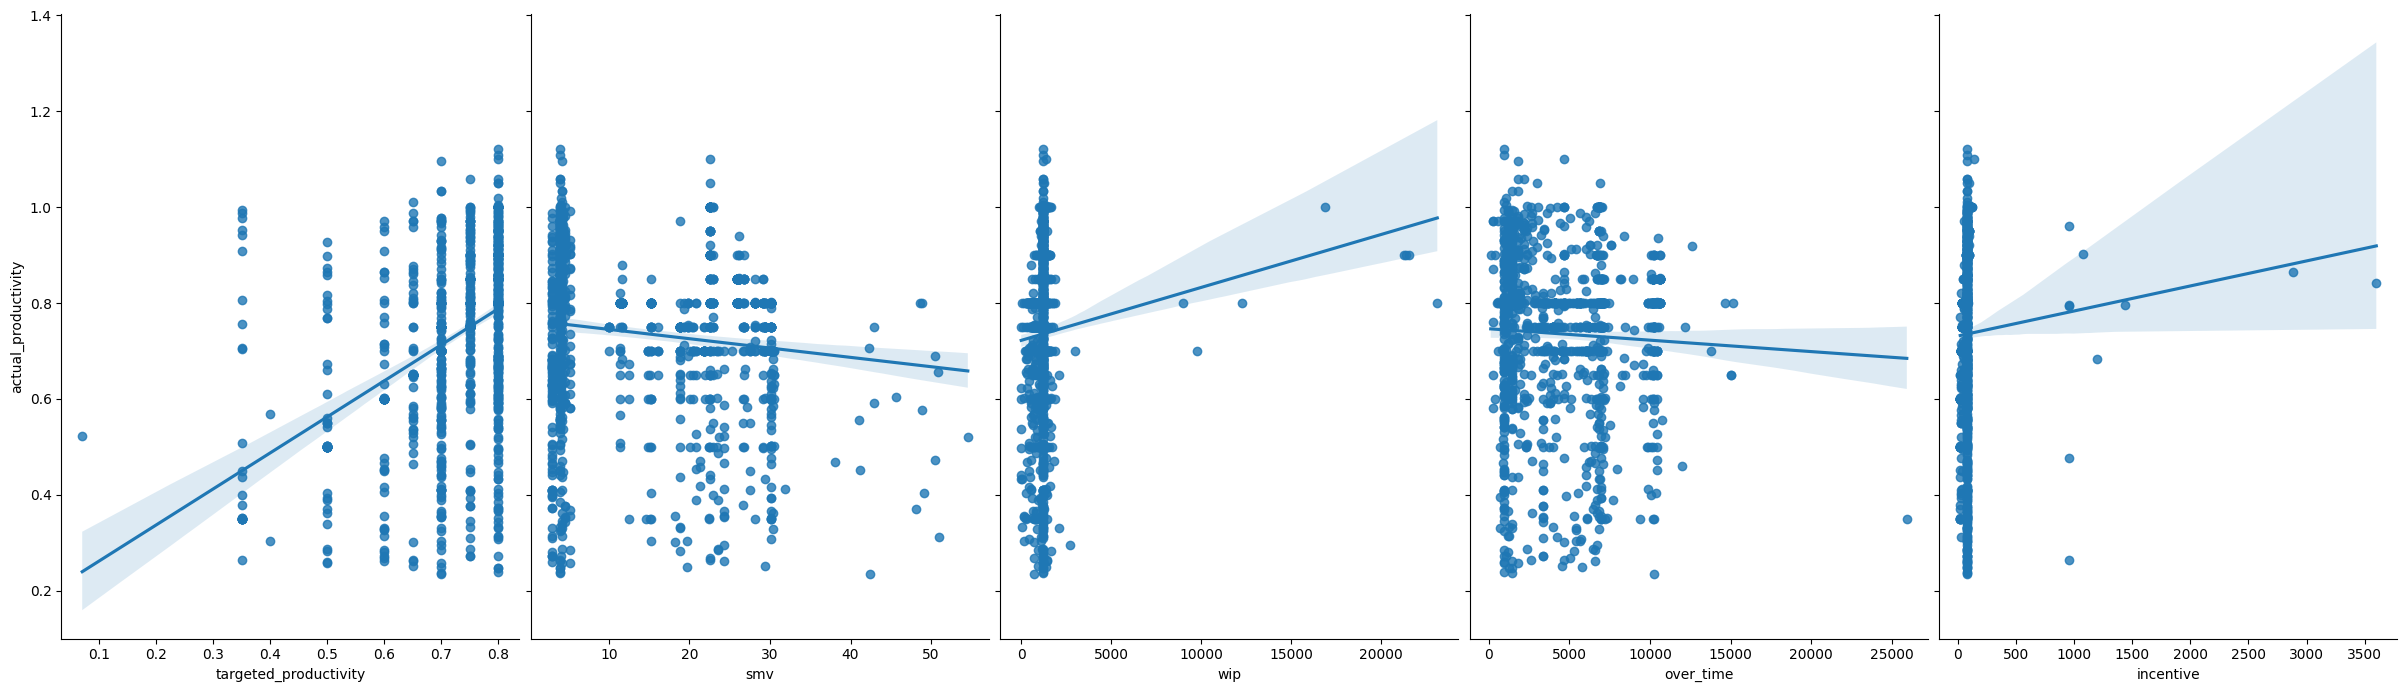

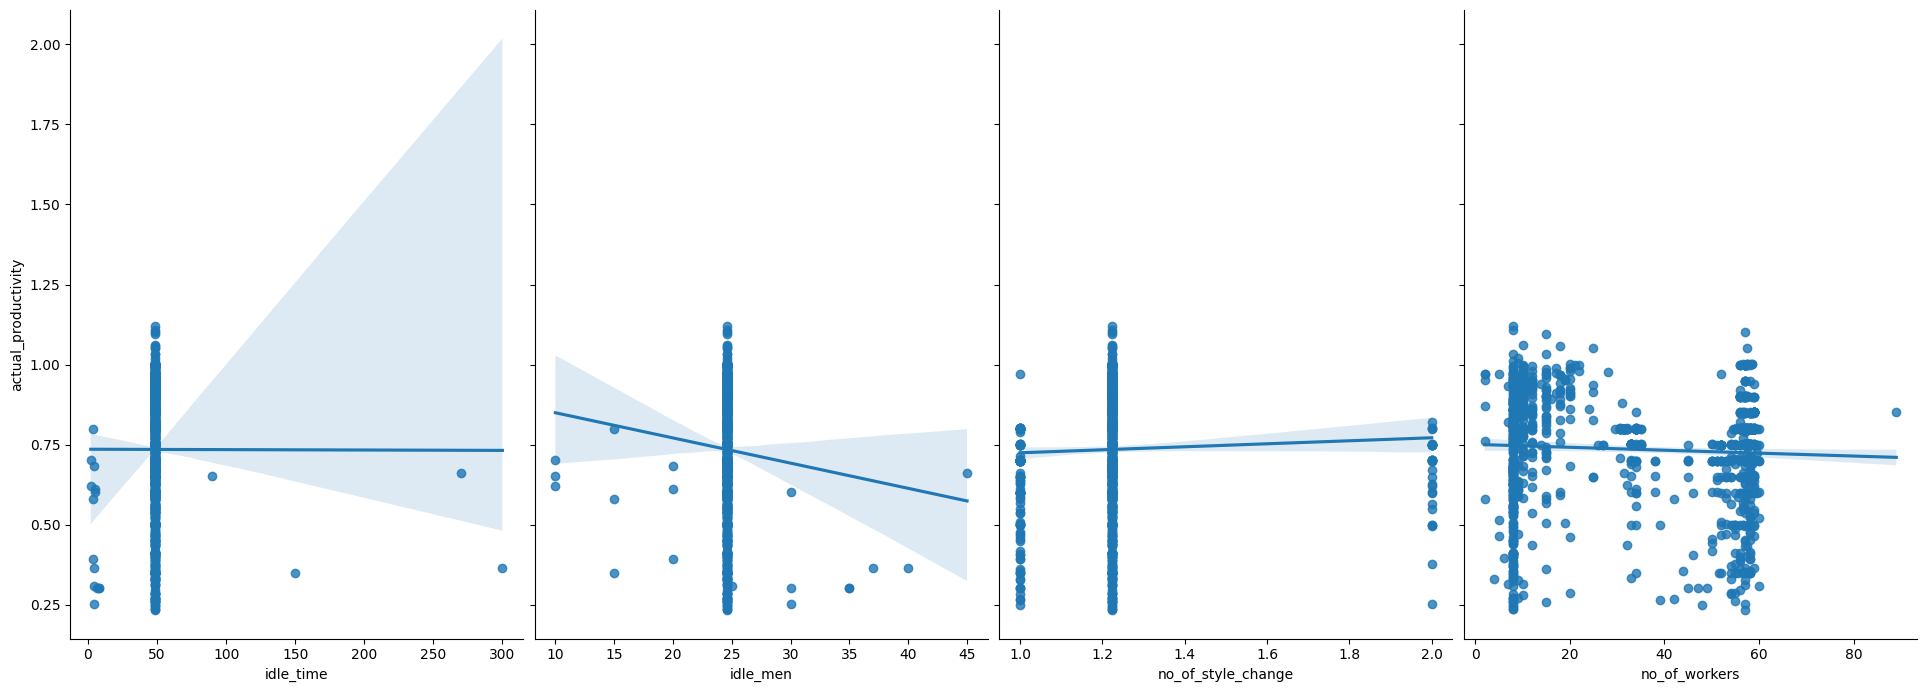

In [40]:
sns.pairplot(data, x_vars=["targeted_productivity","smv","wip","over_time","incentive"], y_vars="actual_productivity", height=7, aspect=0.7, kind='reg')
sns.pairplot(data, x_vars=["idle_time","idle_men","no_of_style_change", "no_of_workers"], y_vars="actual_productivity", height=7, aspect=0.7, kind='reg')







<Axes: xlabel='department', ylabel='actual_productivity'>

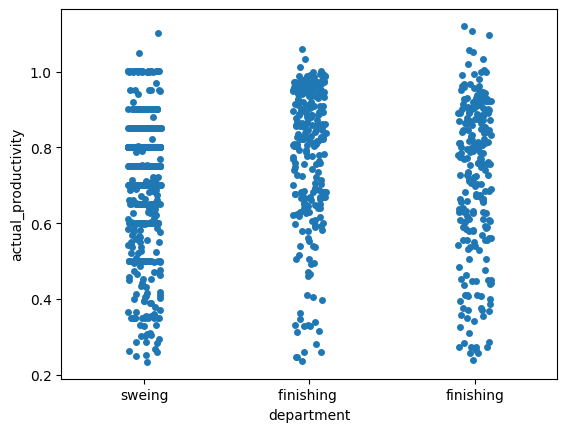

In [41]:
sns.stripplot(data=data, x="department", y="actual_productivity", jitter=True)

<Axes: xlabel='day', ylabel='actual_productivity'>

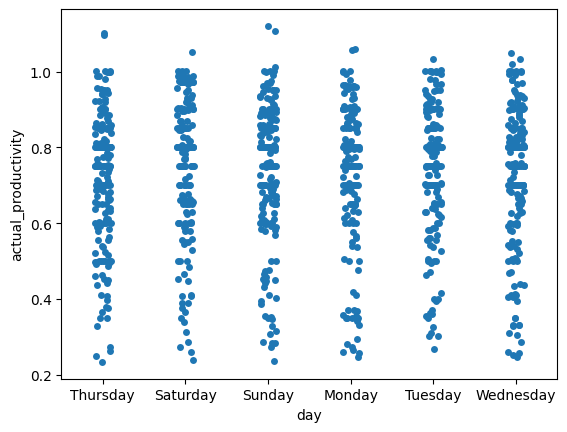

In [34]:
sns.stripplot(data=data, x="day", y="actual_productivity", jitter=True)

## Boxplots

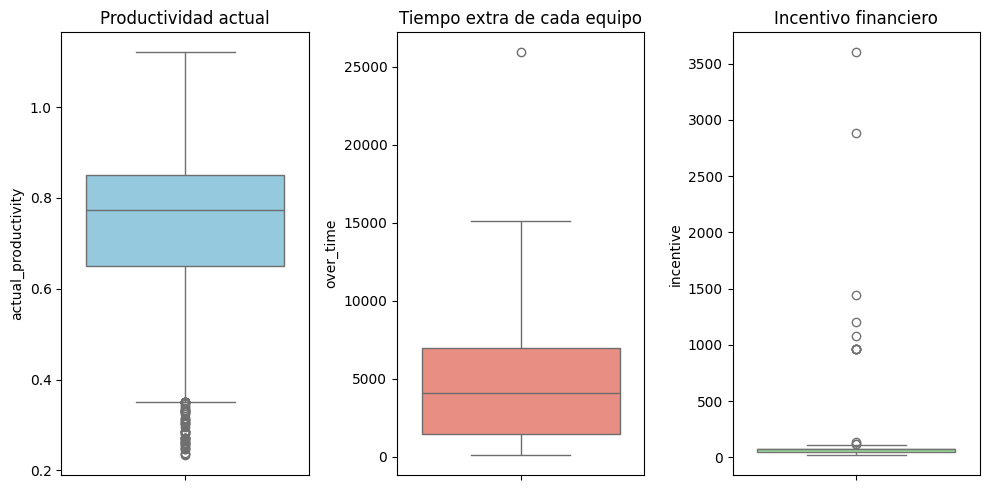

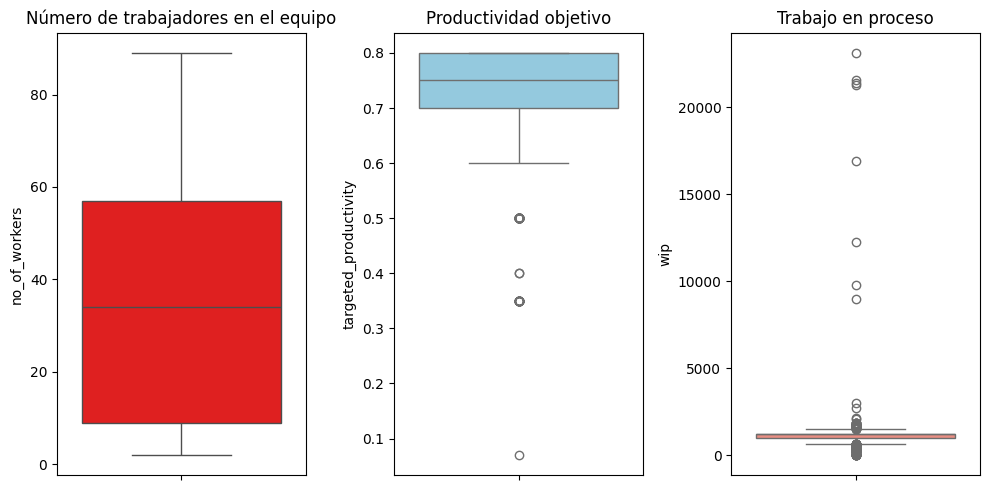

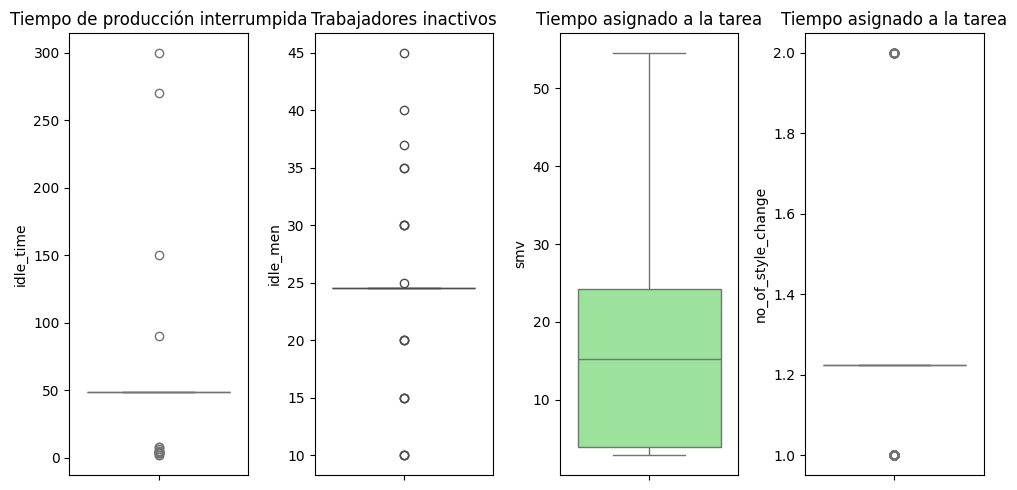

In [45]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=data['actual_productivity'], color='skyblue')
plt.title("Productividad actual")

plt.subplot(1, 3, 2)
sns.boxplot(y=data["over_time"], color='salmon')
plt.title('Tiempo extra de cada equipo')

plt.subplot(1, 3, 3)
sns.boxplot(y=data["incentive"], color='lightgreen')
plt.title("Incentivo financiero")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=data["no_of_workers"], color='red')
plt.title('Número de trabajadores en el equipo')
plt.subplot(1, 3, 2)
sns.boxplot(y=data['targeted_productivity'], color='skyblue')
plt.title("Productividad objetivo")

plt.subplot(1, 3, 3)
sns.boxplot(y=data["wip"], color='salmon')
plt.title('Trabajo en proceso')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
sns.boxplot(y=data["idle_time"], color='lightgreen')
plt.title("Tiempo de producción interrumpida")

plt.subplot(1, 4, 2)
sns.boxplot(y=data["idle_men"], color='red')
plt.title('Trabajadores inactivos')
plt.tight_layout()
plt.subplot(1, 4, 3)
sns.boxplot(y=data["smv"], color='lightgreen')
plt.title('Tiempo asignado a la tarea')
plt.tight_layout()
plt.subplot(1, 4, 4)
sns.boxplot(y=data["no_of_style_change"], color='lightgreen')
plt.title('Tiempo asignado a la tarea')
plt.tight_layout()
plt.show()

## Boxplots para las variables categoricas y la variable de respuesta

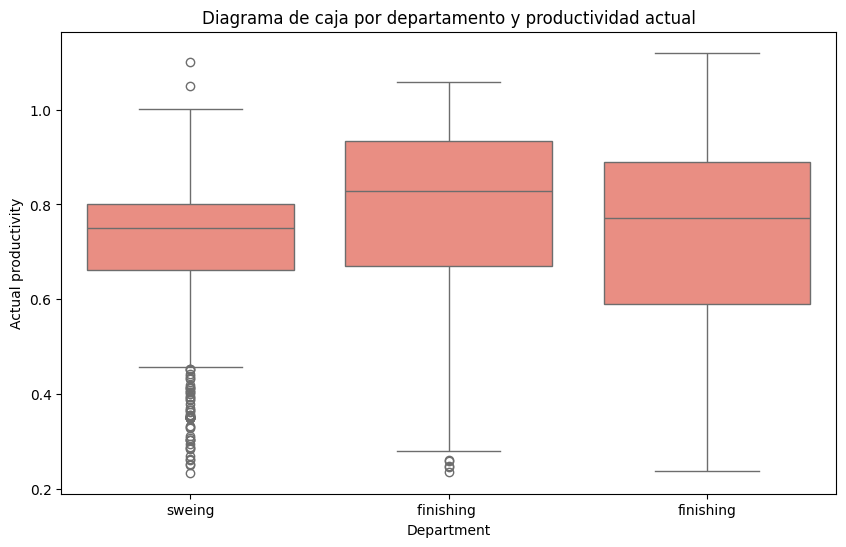

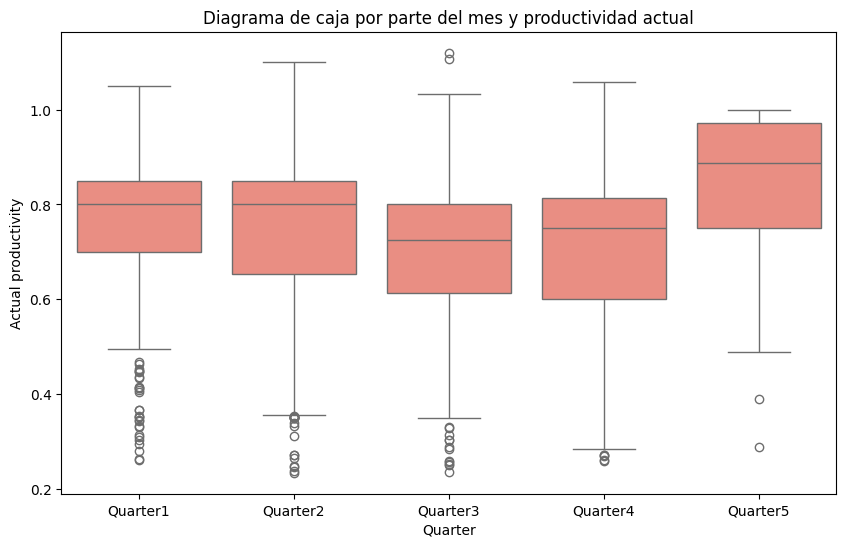

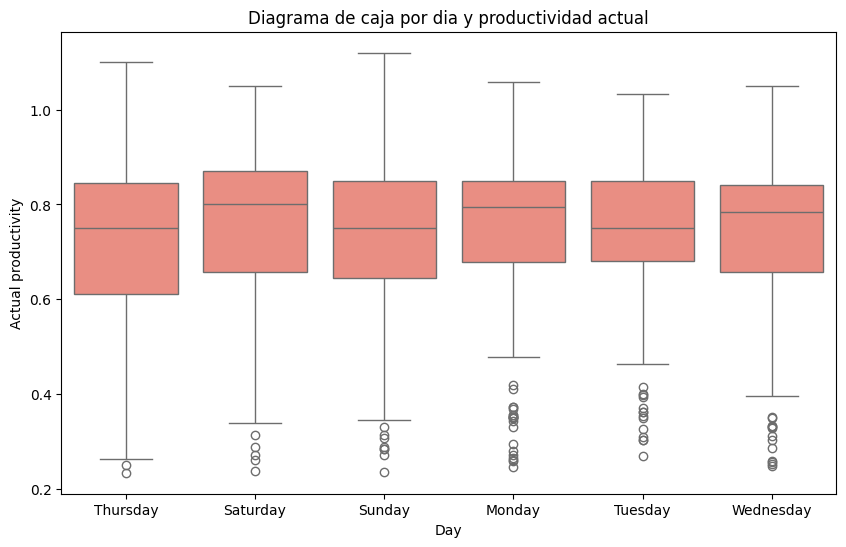

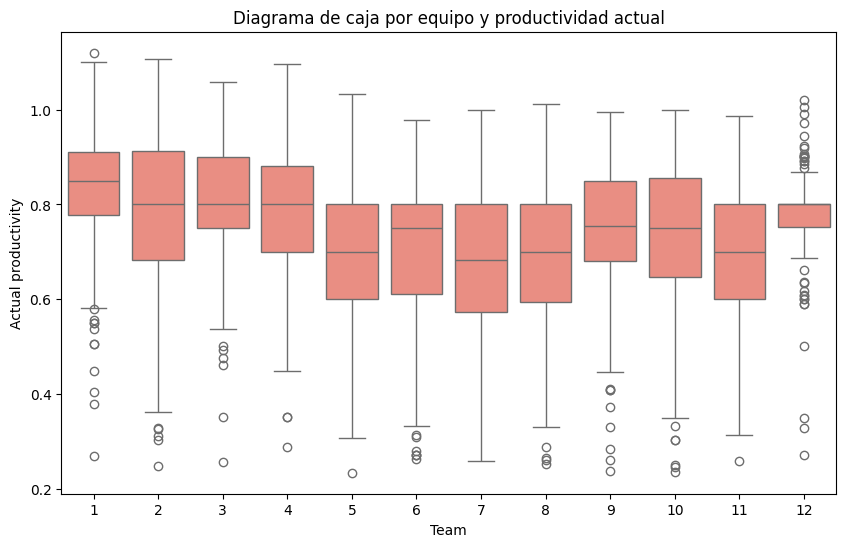

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="department", y="actual_productivity", data=data,color="salmon")
plt.title('Diagrama de caja por departamento y productividad actual')
plt.xlabel('Department')
plt.ylabel('Actual productivity')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="quarter", y="actual_productivity", data=data,color="salmon")
plt.title('Diagrama de caja por parte del mes y productividad actual')
plt.xlabel('Quarter')
plt.ylabel('Actual productivity')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="day", y="actual_productivity", data=data,color="salmon")
plt.title('Diagrama de caja por dia y productividad actual')
plt.xlabel('Day')
plt.ylabel('Actual productivity')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="team", y="actual_productivity", data=data,color="salmon")
plt.title('Diagrama de caja por equipo y productividad actual')
plt.xlabel('Team')
plt.ylabel("Actual productivity")
plt.show()


## Diagrama de violin para variables categoricas

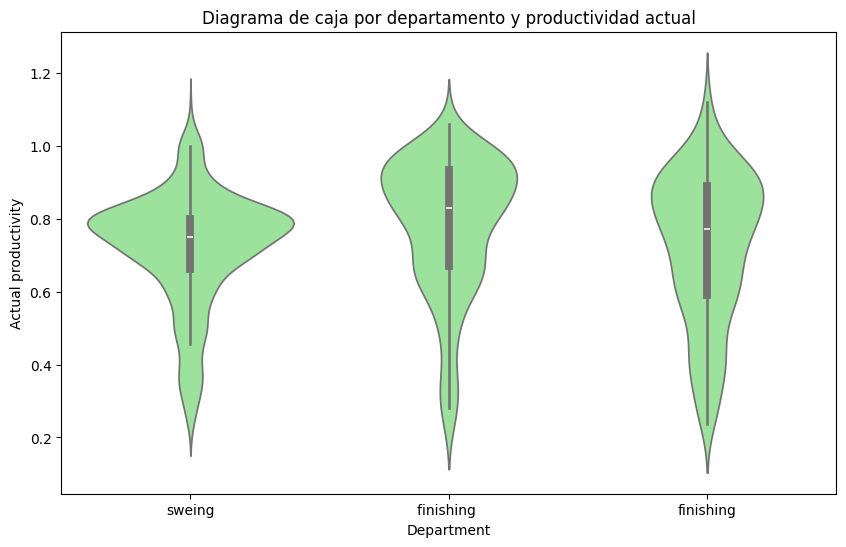

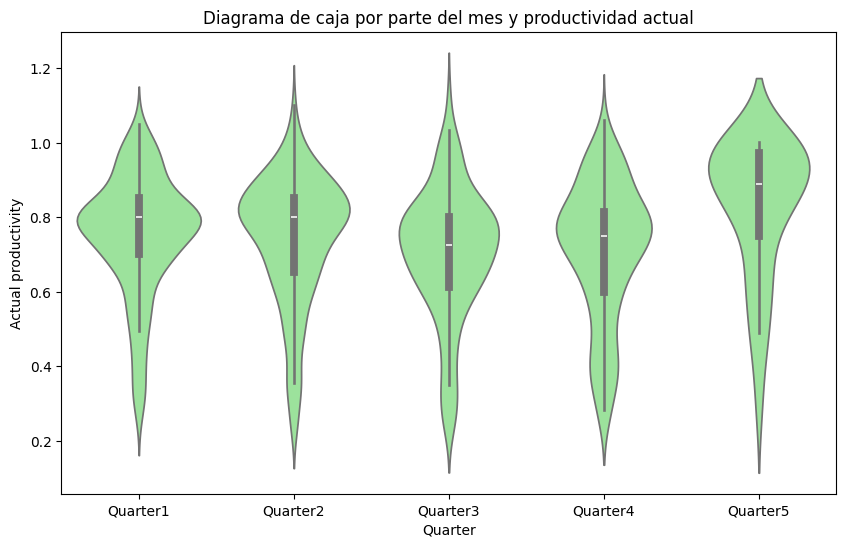

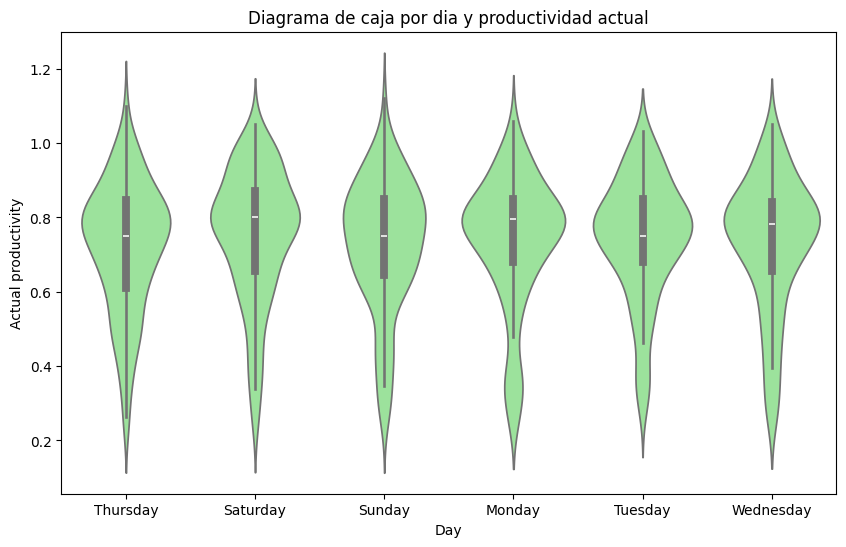

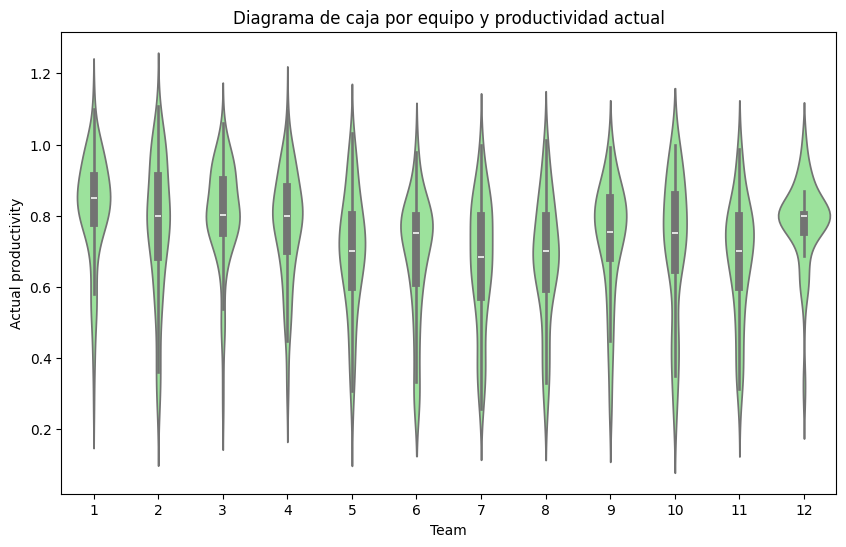

In [62]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x="department", y="actual_productivity", data=data,color="lightgreen")
plt.title('Diagrama de caja por departamento y productividad actual')
plt.xlabel('Department')
plt.ylabel('Actual productivity')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="quarter", y="actual_productivity", data=data,color="lightgreen")
plt.title('Diagrama de caja por parte del mes y productividad actual')
plt.xlabel('Quarter')
plt.ylabel('Actual productivity')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="day", y="actual_productivity", data=data,color="lightgreen")
plt.title('Diagrama de caja por dia y productividad actual')
plt.xlabel('Day')
plt.ylabel('Actual productivity')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="team", y="actual_productivity", data=data,color="lightgreen")
plt.title('Diagrama de caja por equipo y productividad actual')
plt.xlabel('Team')
plt.ylabel("Actual productivity")
plt.show()



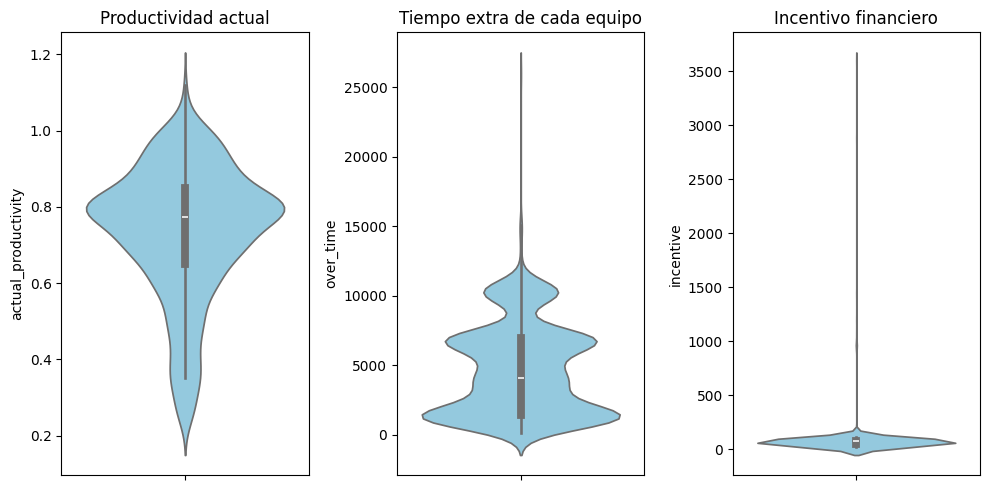

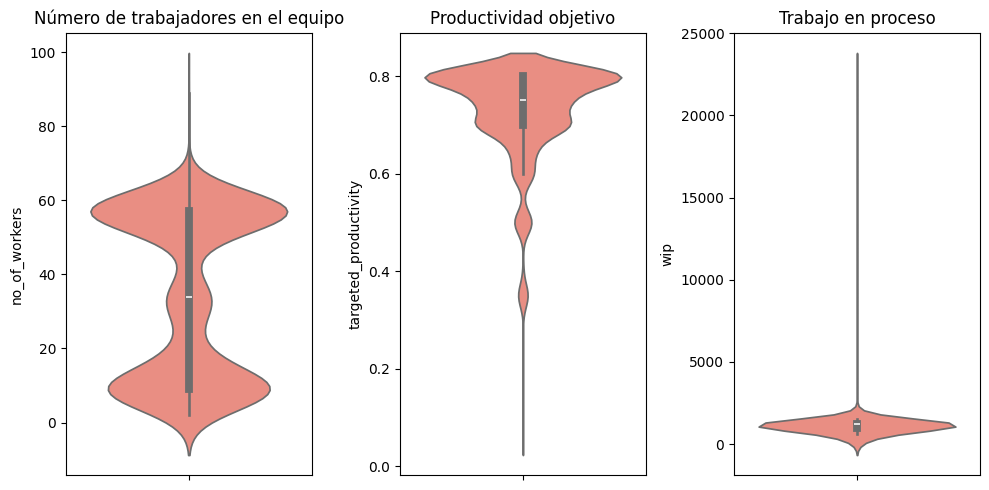

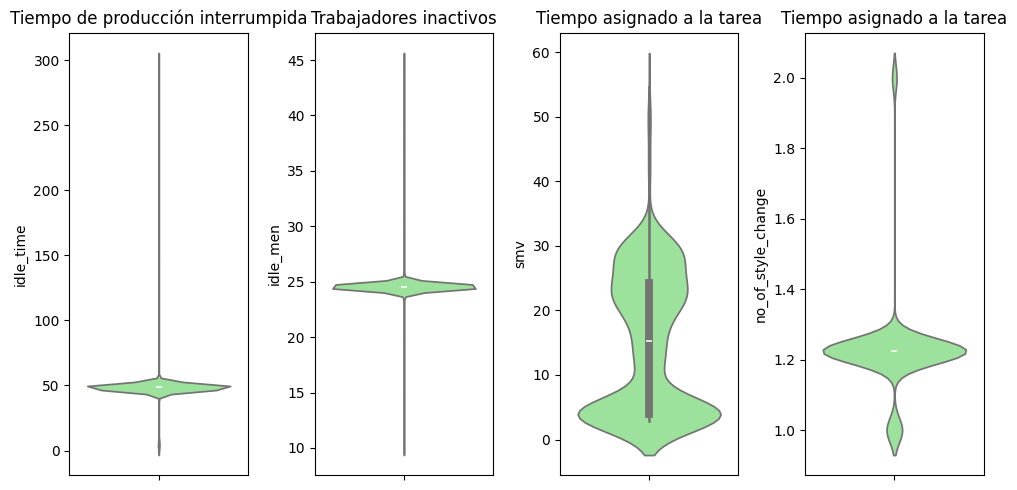

In [67]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.violinplot(y=data['actual_productivity'], color='skyblue')
plt.title("Productividad actual")
plt.subplot(1, 3, 2)
sns.violinplot(y=data["over_time"], color='skyblue')
plt.title('Tiempo extra de cada equipo')

plt.subplot(1, 3, 3)
sns.violinplot(y=data["incentive"], color='skyblue')
plt.title("Incentivo financiero")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.violinplot(y=data["no_of_workers"], color='salmon')
plt.title('Número de trabajadores en el equipo')
plt.subplot(1, 3, 2)
sns.violinplot(y=data['targeted_productivity'], color='salmon')
plt.title("Productividad objetivo")
plt.subplot(1, 3, 3)
sns.violinplot(y=data["wip"], color='salmon')
plt.title('Trabajo en proceso')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
sns.violinplot(y=data["idle_time"], color='lightgreen')
plt.title("Tiempo de producción interrumpida")

plt.subplot(1, 4, 2)
sns.violinplot(y=data["idle_men"], color='lightgreen')
plt.title('Trabajadores inactivos')
plt.subplot(1, 4, 3)
sns.violinplot(y=data["smv"], color='lightgreen')
plt.title('Tiempo asignado a la tarea')
plt.subplot(1, 4, 4)
sns.violinplot(y=data["no_of_style_change"], color='lightgreen')
plt.title('Tiempo asignado a la tarea')
plt.tight_layout()
plt.show()